In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from matplotlib import pyplot as plt

In [2]:
def bootstrap(data, n):
    return np.random.choice(data, size=n)

def random_forest(n_trees, asd):
    RandomForestClassifier(n_estimators=n_trees)

# Data

In [3]:
landsat_train_features = pd.read_csv('landsat_train.csv', dtype=int, names=["label", "d1", "d2", "d3", "d4", "d5", "d6", "d7", "d8", "d9"])
landsat_train_labels = landsat_train_features.pop('label')

landsat_test_features = pd.read_csv('landsat_validation.csv', dtype=int, names=["label", "d1", "d2", "d3", "d4", "d5", "d6", "d7", "d8", "d9"])
landsat_test_labels = landsat_test_features.pop('label')

# Fit Random Forest

In [4]:
n_trees = 10
forest = RandomForestClassifier(n_estimators=n_trees, bootstrap=True, criterion='gini').fit(landsat_train_features, landsat_train_labels)

# Run predictions

In [5]:
y_pred = forest.predict(landsat_test_features)
metrics.accuracy_score(landsat_test_labels, y_pred)

0.7467163537637452

# Display feature importance

In [6]:
feature_imp = pd.Series(forest.feature_importances_, index = ["d1", "d2", "d3", "d4", "d5", "d6", "d7", "d8", "d9"]).sort_values(ascending = False)
feature_imp

d4    0.449301
d5    0.168959
d1    0.143583
d3    0.081618
d7    0.049729
d8    0.033433
d6    0.028854
d9    0.022577
d2    0.021946
dtype: float64

# Visualize predictions

In [7]:
landsat_area = pd.read_csv('landsat_area.csv', dtype=int, names=["d1", "d2", "d3", "d4", "d5", "d6", "d7", "d8", "d9"])

In [8]:
landsat_area_pred = forest.predict(landsat_area)
img = np.reshape(landsat_area_pred, (-1, 3000))

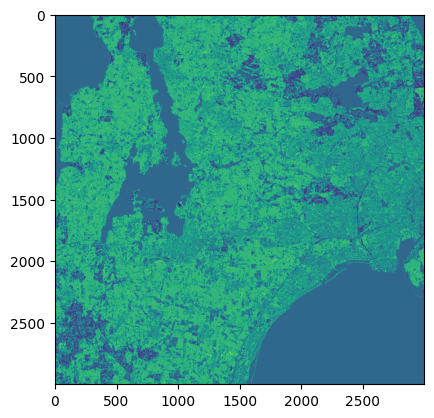

In [10]:
#plt.figure()
#plt.imshow(np.reshape(landsat_area, (-1, 3000)))
plt.figure()
plt.imshow(img)